In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install image_slicer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 14.7 MB/s 


In [2]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np 
import pandas as pd
import torchvision
import matplotlib.pyplot as plt
from PIL import Image
import joblib
from google.colab import drive
import pywt
from matplotlib.image import imread

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
root_dir = '/content/drive/MyDrive/Colab Notebooks/'
dataset_path = os.path.join(root_dir,'Steganography/Dataset')

train_csv = os.path.join(root_dir,'train_dataset.csv')
valid_csv = os.path.join(root_dir,'validation_dataset.csv')
test_csv = os.path.join(dataset_path,'validation_dataset.csv')
train_folder = os.path.join(dataset_path,'newTrain')
validation_folder = os.path.join(dataset_path,'valid')

In [ ]:
cover = '/content/drive/MyDrive/Colab Notebooks/scrambledlion.png'
secret = '/content/drive/MyDrive/Colab Notebooks/white.jpg'

dataset = [{
        'cover_image':cover,
        'secret_image':secret
    }]
    
dataframe = pd.DataFrame(dataset)
cover = Image.open(cover)
secret = Image.open(secret)


In [ ]:
%matplotlib inline

In [ ]:

IMG_SIZE = 64
LEARNING_RATE  = 0.001
COVER_LOSS_WEIGHT = 1
SECRET_LOSS_WEIGHT = 1
TRAIN_BATCH_SIZE = 16
VALID_BATCH_SIZE = 1
EPOCHS = 1000
DECODER_LOSS_WEIGHT = 1

In [ ]:
imagetransformation = {
    'train_transforms':torchvision.transforms.Compose([torchvision.transforms.Resize((IMG_SIZE,IMG_SIZE)),torchvision.transforms.ToTensor()]),
    'valid_transforms':torchvision.transforms.Compose([torchvision.transforms.Resize((IMG_SIZE,IMG_SIZE)),torchvision.transforms.ToTensor()]),
}
# 'test_transforms':torchvision.transforms.Compose([torchvision.transforms.Resize(cover.size),torchvision.transforms.ToTensor()])

In [10]:
import math, time, sys
from PIL import Image
class Arnold:

    def __init__(self, a:int, b:int, rounds:int):
        # Parameters
        self.a = a
        self.b = b
        self.rounds = rounds

    def mapping(self, s:np.shape):
        x, y = np.meshgrid(range(s[0]), range(s[0]), indexing="ij")
        xmap = (self.a*self.b*x + x + self.a*y) % s[0]
        ymap = (self.b*x + y) % s[0]
        return xmap, ymap

    def inverseMapping(self, s:np.shape):
        x, y = np.meshgrid(range(s[0]), range(s[0]), indexing="ij")
        xmap = (x - self.a*y) % s[0]
        ymap = (-self.b*x + self.a*self.b*y + y) % s[0]
        return xmap, ymap

    def applyTransformTo(self, image:np.ndarray):
        xm, ym = self.mapping(image.shape)
        img = image
        for r in range(self.rounds):
            img = img[xm, ym]
        return img

    def applyInverseTransformTo(self, image:np.ndarray):
        xm, ym = self.inverseMapping(image.shape)
        img = image
        for r in range(self.rounds):
          img = img[xm, ym]
        return img

In [7]:
def wtransform(img):
  image = np.array(img)

  coeffs = [[],[],[]]

  for ch in range(3):
    # Perform wavelet transform
    coeffs[ch] = pywt.swt2(image[:,:,ch], 'haar',level=1)
  return coeffs, image
def iwtransform(coeffs,image):
  image[:,:,0] = pywt.iswt2(coeffs[0], 'haar')
  image[:,:,1] = pywt.iswt2(coeffs[1], 'haar')
  image[:,:,2] = pywt.iswt2(coeffs[2], 'haar')
  return Image.fromarray(np.uint8(image))

In [9]:
img = Image.open('/content/drive/MyDrive/Colab Notebooks/revealed.png')
coeffs, image = wtransform(img)
coeffs.save("nikesh.png")

AttributeError: ignored

In [15]:
arnold = Arnold(6, 40, 33)
img = Image.open('/content/drive/MyDrive/Colab Notebooks/Steganography/NikeshS.jpg')
img = np.array(img)
img = arnold.applyTransformTo(img)
im1 = Image.fromarray(img)
im1.save("nikesh.png")
img = arnold.applyInverseTransformTo(img)
im1 = Image.fromarray(img)
im1.save("nikesh2.png")

In [7]:

# Load the image
img = Image.open('/content/drive/MyDrive/Colab Notebooks/revealed.png')

arnold = Arnold(6, 40, 33)
coeffs, image = wtransform(img)
temp = [[],[],[]]
coeff, cA, cH, cV, cD = [temp[:] for i in range(5)]
# cA = arnold.applyTransformTo(cA)
# cA = arnold.applyInverseTransformTo(cA)
for ch in range(3):
  [(cA[ch], (cH[ch], cV[ch], cD[ch]))] = coeffs[ch]
  # coeff[ch]= [(cA, (cH, cV, cD))]

cAA = np.stack((cA[0], cA[1], cA[2]), axis=-1)
cHH = np.stack((cH[0], cH[1], cH[2]), axis=-1)
cVV = np.stack((cV[0], cV[1], cV[2]), axis=-1)
cDD = np.stack((cD[0], cD[1], cD[2]), axis=-1)
print(cAA)
for ch in range(3):
  coeff[ch]= [(cAA[:,:,ch], (cHH[:,:,ch], cVV[:,:,ch], cDD[:,:,ch]))]

# test = Image.fromarray(np.uint8(cAA))
# test.save("test.png")
# img = iwtransform(coeff,image)
# img.save("hel.png")
# [(cA, (cH, cV, cD))] = coeffs[0]
# Obtain the coefficient slices

# print(original_image)
# original_image.save("myimage.png")
# Perform inverse wavelet transform
# reconstructed_image = pywt.iswt2((cA, (cH, cV, cD)), 'haar')

# Plot the original
# plt.imshow(image, cmap='gray')
# plt.title("Original Image")

# plt.show()


[[[306.  307.  180.5]
  [282.  268.5 147.5]
  [257.5 230.  122. ]
  ...
  [ 86.   95.5  51. ]
  [ 93.5 104.5  57.5]
  [208.5 218.5 134.5]]

 [[303.5 306.5 174. ]
  [274.  263.5 136. ]
  [234.  212.5  93. ]
  ...
  [ 73.   84.5  31. ]
  [ 65.5  84.5  39.5]
  [185.  200.5 114. ]]

 [[341.5 330.5 206.5]
  [286.  265.  146. ]
  [235.  205.   89. ]
  ...
  [ 74.   90.   35.5]
  [ 80.  101.   65. ]
  [216.5 224.5 145.5]]

 ...

 [[295.  277.  269. ]
  [288.5 267.  264. ]
  [288.5 264.5 263.5]
  ...
  [263.5 322.  291.5]
  [268.5 336.5 293.5]
  [284.5 309.  281.5]]

 [[312.  291.5 284.5]
  [305.5 277.  272.5]
  [301.  267.  265. ]
  ...
  [268.  325.5 298.5]
  [269.  331.  293.5]
  [290.5 310.  287.5]]

 [[325.5 313.  252. ]
  [310.  286.  226.5]
  [289.  253.5 201.5]
  ...
  [183.  216.  186. ]
  [195.  226.  190.5]
  [264.5 274.5 228. ]]]


In [ ]:
def iwtransform(img):

  row = int(img.shape[0]/2)
  col = int(img.shape[1]/2)
   # Create a list of slice objects for the array slices
  slices = [np.s_[:row, :col], np.s_[:row, col:col*2], np.s_[row:row*2, :col], np.s_[row:row*2, col:col*2]]
  
  A = np.vstack((img[0], img[1]))
  B = np.vstack((img[2], img[3]))
  final = np.hstack((A, B))
  # print(final)

  # Create a dictionary of slice objects for the array slices
  dictionary = {'ad': slices[1], 'da': slices[2], 'dd': slices[3]}
  reconstructed = []
  # Put the slices and dictionary together into the desired format
  result = [slices[0], dictionary]
  print(result)
  for ch in range(3):
    coe = pywt.array_to_coeffs(img[:,:,ch], result)
    test = [(coe[0],(coe[1]['ad'],coe[1]['da'],coe[1]['dd']))]
    # Perform the inverse stationary wavelet transform
    reconstructed.append(pywt.iswt2(test, wavelet=w))
  # plt.imshow(reconstructed[0],cmap='gray',vmin=-0.25,vmax=0.75)
  # plt.show()
  return np.dstack([reconstructed[0], reconstructed[1], reconstructed[2]]).astype(np.uint8)

In [ ]:
fimg = iwtransform(wimg)

[(slice(None, 512, None), slice(None, 512, None)), {'ad': (slice(None, 512, None), slice(512, 1024, None)), 'da': (slice(512, 1024, None), slice(None, 512, None)), 'dd': (slice(512, 1024, None), slice(512, 1024, None))}]


In [6]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import pywt
#import image_slicer
plt.rcParams['figure.figsize'] = [16, 16]
plt.rcParams.update({'font.size': 18})
#def wtransform():
A = Image.open('/content/drive/MyDrive/Colab Notebooks/Steganography/NikeshC.jpg')
B = np.mean(A, -1); # Convert RGB to grayscale
print(A)
n = 1
w = 'db1'
coeff = [[],[]]
arr = [[],[],[]]
coeff_slices = [[],[],[]]
final = [] 
for ch in range(3):
  coeffs = pywt.swt2(A[:,:,ch],wavelet=w,level=n)
  
  # data = np.zeros_like(A)
  # print(data.shape)
  # print(coeffs[0])
  # coeffs[1] = pywt.wavedec2(A[:,:,1],wavelet=w,level=n)
  # coeffs[2] = pywt.wavedec2(A[:,:,2],wavelet=w,level=n)

  # normalize each coefficient array

  coeff[0] = coeffs[0][0] / np.abs(coeffs[0][0]).max()
  for detail_level in range(n):
      coeff[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[0][detail_level + 1]]

  arr[ch], coeff_slices[ch] = np.array(pywt.coeffs_to_array(coeff))
  #print(arr[ch])
  #print(coeff_slices[ch])

  final_img = np.dstack([arr[0]*255, arr[1]*255, arr[2]*255]).astype(np.uint8)

  row = final_img.shape[0]/2
  col = final_img.shape[1]/2

  final[0] = final_img[:int(row), :int(col), :]
  final[1] = final_img[:int(row), int(col):, :]
  final[2] = final_img[int(row):, :int(col), :]
  final[3] = final_img[int(row):, int(col):, :]

#return final
#row = final_img.shape[0]/2
#col = final_img.shape[1]/2

# a = arr[coeff_slices[1]['dd']]
#plt.imshow(final_img[:int(row), :int(col), :],cmap='gray',vmin=-0.25,vmax=0.75)
#plt.imshow(final_img[:int(row), int(col):, :],cmap='gray',vmin=-0.25,vmax=0.75)
#plt.imshow(final_img[int(row):, :int(col), :],cmap='gray',vmin=-0.25,vmax=0.75)
plt.imshow(final_img[int(row):, int(col):, :],cmap='gray',vmin=-0.25,vmax=0.75)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Nikesh.png')
plt.show()

#wtransform()

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1059x1059 at 0x7F4586D5FDC0>


TypeError: ignored

In [ ]:
img = imread('/content/drive/MyDrive/Colab Notebooks/revealed.png')
wimg = wtransform(img)

# plt.imshow(fimg,cmap='gray',vmin=-0.25,vmax=0.75)
# plt.show()

[(slice(None, 512, None), slice(None, 512, None)), {'ad': (slice(None, 512, None), slice(512, 1024, None)), 'da': (slice(512, 1024, None), slice(None, 512, None)), 'dd': (slice(512, 1024, None), slice(512, 1024, None))}]


<ipython-input-93-5cc36b55ea40>:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr[ch], coeff_slices[ch] = np.array(pywt.coeffs_to_array(coeff))


In [ ]:
ar = np.array([[12,20,5,1] ,[13,15,6,3],[1,5,8,3],[12,5,6,9]])
print(ar)
print(np.vstack((ar[:2,:2], ar[2:,:2])))
print("Shape of the array:")
print(ar.shape)

[[12 20  5  1]
 [13 15  6  3]
 [ 1  5  8  3]
 [12  5  6  9]]
[[12 20]
 [13 15]
 [ 1  5]
 [12  5]]
Shape of the array:
(4, 4)


n01641577_444.JPEG


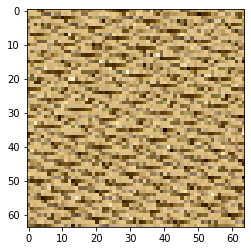

In [ ]:
images = os.listdir('/content/drive/MyDrive/Colab Notebooks/Steganography/Dataset/newTrain')
print(images[0])
lena = np.array(Image.open(os.path.join('/content/drive/MyDrive/Colab Notebooks/Steganography/Dataset/newTrain',images[0])))
plt.imshow(lena,cmap='gray',vmin=-1,vmax=1)


In [ ]:

import os
images = os.listdir('/content/drive/MyDrive/Colab Notebooks/Steganography/Dataset/train')
a = 6
b = 40
rounds = 33

arnold = Arnold(a, b, rounds)

for i in range(len(images)):
  lena = np.array(Image.open(os.path.join(train_folder,images[i])))
  # Arnold Transform Parameters

  # start_time = time.time()
  scrambled = arnold.applyTransformTo(lena)
  #exec_time = time.time() - start_time
  #print("Transform  execution time: %.6f " % exec_time, "sec")
  im = Image.fromarray(scrambled)
  im.save(os.path.join('/content/drive/MyDrive/Colab Notebooks/Steganography/Dataset/newTrain',images[i]), format="png")

  # #start_time = time.time()
  # reconstructed = arnold.applyInverseTransformTo(scrambled)
  # #exec_time = time.time() - start_time
  # #print("Inverse T. execution time: %.6f " % exec_time, "sec")
  # im = Image.fromarray(reconstructed)
  # im.save("/content/drive/MyDrive/Colab Notebooks/reconstructed.png", format="png")


In [ ]:
#conversion of image into resized format and return of trnasformed image
class SteganoDataset(torch.utils.data.Dataset):
    def __init__(self,dataset_csv,transforms,type_of_dataset,mypath,size='complete'):
        self.dataset = pd.read_csv(dataset_csv)
        # self.dataset = dataset_csv
        self.dataset = self.dataset.reset_index(drop=True)
        if size !='complete':
            self.dataset = self.dataset[:2]
        self.transforms = transforms
        self.type = type_of_dataset
        self.mypath = mypath
    
    def __getitem__(self,index):
        cover_image = self.dataset.iloc[index]['cover_image']
        secret_image = self.dataset.iloc[index]['secret_image']
        scover_image = Image.open(os.path.join(root_dir,'Steganography/Dataset'+self.mypath,cover_image))
        cover_image = Image.open(os.path.join(root_dir,'Steganography/Dataset/train',cover_image))
        secret_image = Image.open(os.path.join(root_dir,'Steganography/Dataset/train',secret_image))
        transformed_cover_image = self.transforms(cover_image)
        transformed_secret_image = self.transforms(secret_image)
        

        if self.type == 'train':
            return {
                'cover_image':transformed_cover_image,
                'secret_image':transformed_secret_image,
            }
        else:
            return {
                'cover_image':transformed_cover_image,
                'secret_image':transformed_secret_image,
            }
    
    def __len__(self):
      return len(self.dataset)

In [ ]:
class PrepNetwork1(nn.Module):
    def __init__(self):
        super(PrepNetwork1, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv2 = nn.Conv2d(in_channels=3,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv3 = nn.Conv2d(in_channels=3,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv4 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv5 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv6 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
    
    def forward(self,secret_image):


        output_1 = F.relu(self.conv1(secret_image))
        output_2 = F.relu(self.conv2(secret_image))
        output_3 = F.relu(self.conv3(secret_image))

        concatenated_image = torch.cat([output_1,output_2,output_3],dim=1)

        output_4 = F.relu(self.conv4(concatenated_image))
        output_5 = F.relu(self.conv5(concatenated_image))
        output_6 = F.relu(self.conv6(concatenated_image))

        final_concat_image = torch.cat([output_4,output_5,output_6],dim=1)

        return final_concat_image

class HidingNetwork(nn.Module):
    def __init__(self):
        super(HidingNetwork, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=68,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv2 = nn.Conv2d(in_channels=68,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv3 = nn.Conv2d(in_channels=68,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv4 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv5 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv6 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv7 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv8 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv9 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv10 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv11 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv12 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv13 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv14 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv15 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.final_layer = nn.Conv2d(in_channels=65,out_channels=3,kernel_size=(3,3),stride=1,padding=1)
        
    def forward(self,secret_image_1,cover_image):
        concatenated_secrets = torch.cat([cover_image,secret_image_1],dim=1)

        
        output_1 = F.relu(self.conv1(concatenated_secrets))
        output_2 = F.relu(self.conv2(concatenated_secrets))
        output_3 = F.relu(self.conv3(concatenated_secrets))
       
        concat_1 = torch.cat([output_1,output_2,output_3],dim=1)
        
        output_4 = F.relu(self.conv4(concat_1))
        output_5 = F.relu(self.conv5(concat_1))
        output_6 = F.relu(self.conv6(concat_1))
        concat_2 = torch.cat([output_4,output_5,output_6],dim=1)
        
        output_7 = F.relu(self.conv7(concat_2))
        output_8 = F.relu(self.conv8(concat_2))
        output_9 = F.relu(self.conv9(concat_2))
        concat_3 = torch.cat([output_7,output_8,output_9],dim=1)
        
        output_10 = F.relu(self.conv10(concat_3))
        output_11 = F.relu(self.conv11(concat_3))
        output_12 = F.relu(self.conv12(concat_3))
        concat_4 = torch.cat([output_10,output_11,output_12],dim=1)
        
        output_13 = F.relu(self.conv13(concat_4))
        output_14 = F.relu(self.conv14(concat_4))
        output_15 = F.relu(self.conv15(concat_4))
        concat_5 = torch.cat([output_13,output_14,output_15],dim=1)
        
        output_converted_image = F.relu(self.final_layer(concat_5))
        
        return output_converted_image

In [ ]:
class Encoder(nn.Module):
    def __init__(self,prep_network_1,hiding_network):
        super(Encoder, self).__init__()
        self.prep_network1 = prep_network_1
        self.hiding_network = hiding_network
    
    def forward(self,cover_image,secret_image_1):
        encoded_secret_image_1 = self.prep_network1(secret_image_1)


        hidden_image = self.hiding_network(encoded_secret_image_1,cover_image)

#         hidden_image = (0.01**0.5)*torch.randn(hidden_image.size(),device=device)
        return hidden_image

In [ ]:
class RevealNetwork1(nn.Module):
    def __init__(self):
        super(RevealNetwork1,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv2 = nn.Conv2d(in_channels=3,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv3 = nn.Conv2d(in_channels=3,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv4 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv5 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv6 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv7 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv8 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv9 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv10 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv11 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv12 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.conv13 = nn.Conv2d(in_channels=65,out_channels=50,kernel_size=(3,3),stride=1,padding=1)
        self.conv14 = nn.Conv2d(in_channels=65,out_channels=10,kernel_size=(3,3),stride=1,padding=1)
        self.conv15 = nn.Conv2d(in_channels=65,out_channels=5,kernel_size=(5,5),stride=1,padding=2)
        
        self.final_layer = nn.Conv2d(in_channels=65,out_channels=3,kernel_size=(3,3),stride=1,padding=1)    
    
    def forward(self,hidden_image):
        
        output_1 = F.relu(self.conv1(hidden_image))
        output_2 = F.relu(self.conv2(hidden_image))
        output_3 = F.relu(self.conv3(hidden_image))
        concat_1 = torch.cat([output_1,output_2,output_3],dim=1)
        
        output_4 = F.relu(self.conv4(concat_1))
        output_5 = F.relu(self.conv5(concat_1))
        output_6 = F.relu(self.conv6(concat_1))
        concat_2 = torch.cat([output_4,output_5,output_6],dim=1)
        
        output_7 = F.relu(self.conv7(concat_2))
        output_8 = F.relu(self.conv8(concat_2))
        output_9 = F.relu(self.conv9(concat_2))
        concat_3 = torch.cat([output_7,output_8,output_9],dim=1)
        
        output_10 = F.relu(self.conv10(concat_3))
        output_11 = F.relu(self.conv11(concat_3))
        output_12 = F.relu(self.conv12(concat_3))
        concat_4 = torch.cat([output_10,output_11,output_12],dim=1)
        
        output_13 = F.relu(self.conv13(concat_4))
        output_14 = F.relu(self.conv14(concat_4))
        output_15 = F.relu(self.conv15(concat_4))
        concat_5 = torch.cat([output_13,output_14,output_15],dim=1)
        
        output_revealed_image = F.relu(self.final_layer(concat_5))
        
        return output_revealed_image

In [ ]:
class Decoder(nn.Module):
    def __init__(self,reveal_network_1):
        super(Decoder, self).__init__()
        self.reveal_network_1 = reveal_network_1
    
    def forward(self,hidden_image):
        reveal_image_1 = self.reveal_network_1(hidden_image)
        return reveal_image_1

In [ ]:
class SteganoModel(nn.Module):
    def __init__(self,encoder,decoder):
        super(SteganoModel,self).__init__()
        self.encoder = encoder
        self.decoder = decoder
    
    def forward(self,cover_image,secret_image_1,hidden_image,mode):
        if mode == 'full':
            for param in self.encoder.parameters():
                param.requires_grad = True
            for param in self.decoder.parameters():
                param.requires_grad = False
            hidden_image = self.encoder(cover_image,secret_image_1)
            reveal_image_1 = self.decoder(hidden_image)
            return hidden_image,reveal_image_1
        elif mode == 'encoder':
            for param in self.encoder.parameters():
                param.requires_grad = False
            for param in self.decoder.parameters():
                param.requires_grad = False
            hidden_image = self.encoder(cover_image,secret_image_1)
            return hidden_image
        elif mode == 'decoder':
            for param in self.encoder.parameters():
                param.requires_grad = False
            for param in self.decoder.parameters():
                param.requires_grad = True
            
            reveal_image1 = self.decoder(hidden_image)
            return reveal_image1

In [ ]:

filename = os.path.join("/content/drive/MyDrive/Colab Notebooks/Steganography/Completed_model.joblib")
loaded_model = joblib.load(filename)
#joblib.dump(model, filename)

In [ ]:
prep_1 = PrepNetwork1()
hiding_network = HidingNetwork()

encoder = Encoder(prep_1,hiding_network)

reveal_1 = RevealNetwork1()


decoder = Decoder(reveal_1)

model = SteganoModel(encoder,decoder)
model.to(device)

SteganoModel(
  (encoder): Encoder(
    (prep_network1): PrepNetwork1(
      (conv1): Conv2d(3, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv3): Conv2d(3, 5, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (conv4): Conv2d(65, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv5): Conv2d(65, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv6): Conv2d(65, 5, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    )
    (hiding_network): HidingNetwork(
      (conv1): Conv2d(68, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(68, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv3): Conv2d(68, 5, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (conv4): Conv2d(65, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv5): Conv2d(65, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
 

In [ ]:
class SteganoLoss(nn.Module):
    def __init__(self,cover_weight,secret_weight):
        super(SteganoLoss,self).__init__()
        self.cover_weight = cover_weight
        self.secret_weight = secret_weight
        
    def forward(self,predicted_cover_image,cover_image,
               predicted_secret_image_1,secret_image_1):
    
        cover_loss = self.cover_weight*(F.mse_loss(predicted_cover_image,cover_image))
        secret_loss = self.secret_weight*(F.mse_loss(predicted_secret_image_1,secret_image_1)) 
        return cover_loss + secret_loss

class DecoderLoss(nn.Module):
    def __init__(self,decoder_loss_weight):
        super(DecoderLoss,self).__init__()
        self.decoder_loss_weight = decoder_loss_weight
    
    def forward(self,reveal_output1,secret_image_1):
        reveal1 = self.decoder_loss_weight*F.mse_loss(reveal_output1,secret_image_1)
        return reveal1

In [ ]:

training_csv_path = os.path.join(dataset_path,train_csv)
validation_csv_path = os.path.join(dataset_path,valid_csv)
#test_csv_path = os.path.join('/content/drive/MyDrive/Colab Notebooks','test_dataset.csv')

training_dataset = SteganoDataset(training_csv_path,imagetransformation['train_transforms'],'train','complete')
valid_dataset = SteganoDataset(validation_csv_path,imagetransformation['valid_transforms'],'valid')
# test_dataset = SteganoDataset(test_csv_path,imagetransformation['test_transforms'],'Valid')
# print(test_dataset)


In [ ]:
# test_dataset = SteganoDataset(dataframe,imagetransformation['test_transforms'],'Valid')


train_data_loader = torch.utils.data.DataLoader(training_dataset, 
                                                batch_size = TRAIN_BATCH_SIZE, 
                                                shuffle=True,
                                               drop_last = True,
                                               num_workers = 0
                                               )
valid_data_loader = torch.utils.data.DataLoader(valid_dataset, 
                                                batch_size = VALID_BATCH_SIZE, 
                                                shuffle=True,
                                                drop_last = True,
                                                num_workers = 0
                                               )
'''
test_data_loader = torch.utils.data.DataLoader(test_dataset, 
                                                batch_size = VALID_BATCH_SIZE, 
                                                shuffle=True,
                                                drop_last = True,
                                                num_workers = 0
                                               )

'''

'\ntest_data_loader = torch.utils.data.DataLoader(test_dataset, \n                                                batch_size = VALID_BATCH_SIZE, \n                                                shuffle=True,\n                                                drop_last = True,\n                                                num_workers = 0\n                                               )\n\n'

In [ ]:

full_model_criterion = SteganoLoss(SECRET_LOSS_WEIGHT,COVER_LOSS_WEIGHT)

full_model_optimizer = torch.optim.Adam(model.parameters(),lr=LEARNING_RATE)

decoder_criterion = DecoderLoss(DECODER_LOSS_WEIGHT)


In [ ]:
def train(model,epochs,decoder_criterion,full_model_optimizer,full_model_criterion,learning_rate,training_iterator,training_iterator,valid_iterator,print_every=50):
    
    training_full_model_loss_list = []
    decoder_loss_list = []
    valid_loss_list = []
    encoder_output = []
    hidden_image = []
    reveal_image = []
    arnold = Arnold(6, 40, 33)
    for epoch in range(epochs):
        for index,training_dict in enumerate(training_iterator):
            cover_image = training_dict['cover_image']
            cover_image = cover_image.to(device)

            secret_image_1 = training_dict['secret_image']
            secret_image_1 = secret_image_1.to(device)

            
            full_model_optimizer.zero_grad()
            cCoeff= wtrasform(cover_image)
            sCoeff = wtrasform(secret_image_1)
            [(cA, (cH, cV, cD))] = coeffs[0]
            encoder_output = model(cover_image,secret_image_1,secret_image_1,'encoder')
            
            hidden_image,reveal_image = model(cover_image,secret_image_1,secret_image_1,'full')
            

            full_model_loss = full_model_criterion(hidden_image,cover_image, reveal_image,secret_image_1)
            full_model_loss.backward()
            full_model_optimizer.step()

            full_model_optimizer.zero_grad()
            reveal_output1 = model(cover_image,secret_image_1, encoder_output,'decoder')
            decoder_loss = decoder_criterion(reveal_output1,secret_image_1)

            decoder_loss.backward()
            full_model_optimizer.step()
        for index,training_dict in enumerate(training_iterator):
            cover_image = training_dict['cover_image']
            cover_image = cover_image.to(device)

            secret_image_1 = training_dict['secret_image']
            secret_image_1 = secret_image_1.to(device)

            
            full_model_optimizer.zero_grad()
            
            encoder_output = model(cover_image,secret_image_1,secret_image_1,'encoder')
            
            hidden_image,reveal_image = model(cover_image,secret_image_1,secret_image_1,'full')
            

            full_model_loss = full_model_criterion(hidden_image,cover_image, reveal_image,secret_image_1)
            full_model_loss.backward()
            full_model_optimizer.step()

            full_model_optimizer.zero_grad()
            reveal_output1 = model(cover_image,secret_image_1, encoder_output,'decoder')
            decoder_loss = decoder_criterion(reveal_output1,secret_image_1)

            decoder_loss.backward()
            full_model_optimizer.step()

        training_full_model_loss_list.append(full_model_loss)
        decoder_loss_list.append(decoder_loss)
        if epoch % print_every == 0:
            print("Training full model loss at {} epochs is: {}".format(epoch, full_model_loss))
            print("Training decoder loss at {} epochs is: {}".format(epoch, decoder_loss))

    return model, training_full_model_loss_list,decoder_loss_list


Training full model loss at 0 epochs is: 0.14862200617790222
Training decoder loss at 0 epochs is: 0.056159209460020065
Training full model loss at 50 epochs is: 0.010316253639757633
Training decoder loss at 50 epochs is: 0.006905762478709221
Training full model loss at 100 epochs is: 0.005915718153119087
Training decoder loss at 100 epochs is: 0.004135390743613243
Training full model loss at 150 epochs is: 0.00597141869366169
Training decoder loss at 150 epochs is: 0.003256219904869795
Training full model loss at 200 epochs is: 0.004562869668006897
Training decoder loss at 200 epochs is: 0.0032390698324888945
Training full model loss at 250 epochs is: 0.004033954814076424
Training decoder loss at 250 epochs is: 0.00324784847907722
Training full model loss at 300 epochs is: 0.0028372027445584536
Training decoder loss at 300 epochs is: 0.002142705488950014
Training full model loss at 350 epochs is: 0.003511040238663554
Training decoder loss at 350 epochs is: 0.0028315880335867405
Training full model loss at 400 epochs is: 0.006889783777296543
Training decoder loss at 400 epochs is: 0.006818610243499279
Training full model loss at 450 epochs is: 0.0030810432508587837
Training decoder loss at 450 epochs is: 0.0027422530110925436
Training full model loss at 500 epochs is: 0.0026186055038124323
Training decoder loss at 500 epochs is: 0.00222468632273376
Training full model loss at 550 epochs is: 0.0022935508750379086
Training decoder loss at 550 epochs is: 0.0016986110713332891
Training full model loss at 600 epochs is: 0.0017199815483763814
Training decoder loss at 600 epochs is: 0.0012137810699641705
Training full model loss at 650 epochs is: 0.002981864381581545
Training decoder loss at 650 epochs is: 0.002139737131074071
Training full model loss at 700 epochs is: 0.00157183688133955
Training decoder loss at 700 epochs is: 0.0011825517285615206
Training full model loss at 750 epochs is: 0.001144192647188902
Training decoder loss at 750 epochs is: 0.0006921886233612895
Training full model loss at 800 epochs is: 0.0016071755671873689
Training decoder loss at 800 epochs is: 0.0011148437624797225
Training full model loss at 850 epochs is: 0.0016389719676226377
Training decoder loss at 850 epochs is: 0.0010738647542893887
Training full model loss at 900 epochs is: 0.0011910195462405682
Training decoder loss at 900 epochs is: 0.0007727841730229557
Training full model loss at 950 epochs is: 0.0011191064259037375
Training decoder loss at 950 epochs is: 0.0007212755153886974

In [ ]:
model, training_full_model_loss_list,decoder_loss_list = train(model,EPOCHS,decoder_criterion,full_model_optimizer,full_model_criterion,LEARNING_RATE,train_data_loader,valid_data_loader)

[[[0.5647059  0.5764706  0.5764706  ... 0.23529412 0.2901961  0.32156864]
  [0.54901963 0.5411765  0.43137255 ... 0.43137255 0.4745098  0.4509804 ]
  [0.42745098 0.42352942 0.30980393 ... 0.3764706  0.3529412  0.40784314]
  ...
  [0.03921569 0.40784314 0.02745098 ... 0.30980393 0.24705882 0.30588236]
  [0.13333334 0.26666668 0.03529412 ... 0.2627451  0.07843138 0.2       ]
  [0.09803922 0.31764707 0.24313726 ... 0.27450982 0.21568628 0.15686275]]

 [[0.69411767 0.7137255  0.7137255  ... 0.43529412 0.5019608  0.53333336]
  [0.6784314  0.67058825 0.5686275  ... 0.6313726  0.6862745  0.6627451 ]
  [0.5529412  0.54901963 0.4392157  ... 0.57254905 0.5529412  0.60784316]
  ...
  [0.09803922 0.46666667 0.08627451 ... 0.37254903 0.3019608  0.36078432]
  [0.19607843 0.32941177 0.09803922 ... 0.28235295 0.09803922 0.21568628]
  [0.16078432 0.38039216 0.29803923 ... 0.27450982 0.21176471 0.15294118]]

 [[0.76862746 0.7882353  0.8        ... 0.54901963 0.6117647  0.6431373 ]
  [0.74509805 0.745098

TypeError: ignored

In [ ]:
filename = os.path.join("/content/drive/MyDrive/Colab Notebooks/Steganography/Completed_model.joblib")
# loaded_model = joblib.load(filename)
model = joblib.load(filename)

In [ ]:
def predict(model,iterator,mode):

    predict_dict = next(iter(iterator))
    cover_image = predict_dict['cover_image']
    cover_image = cover_image.to(device)
    secret_image_1 = predict_dict['secret_image']
    secret_image_1 = secret_image_1.to(device)
    
    model.eval()
    if mode =='decoder':
      reveal_image_1= model(cover_image,cover_image,cover_image,mode)
    elif mode =='encoder':
      hidden_image= model(cover_image,secret_image_1,secret_image_1,mode)
    elif mode=="full":
      hidden_image,reveal_image_1= model(cover_image,secret_image_1,secret_image_1,mode)
      cover_image = cover_image * 255
      cover_image = cover_image.to(torch.device('cpu'))
      cover_image = cover_image.detach().to(torch.long)
      secret_image_1 = secret_image_1 * 255
      secret_image_1 = secret_image_1.to(torch.device('cpu'))
      secret_image_1 = secret_image_1.detach().to(torch.long)
    if mode =='encoder'| mode == 'full':
      hidden_image[hidden_image>1] = 1
      hidden_image = hidden_image * 255
      hidden_image = hidden_image.to(torch.device('cpu'))
      hidden_image = hidden_image.detach().to(torch.long)
      h = hidden_image[0].permute(1,2,0).numpy()
      im = Image.fromarray(h.astype(np.uint8))
      im.save("/content/drive/MyDrive/Colab Notebooks/stego_img.png")
      if mode == 'encoder': return h
    if mode =='decoder'| mode == 'full':
      reveal_image_1[reveal_image_1>1] = 1
      reveal_image_1 = reveal_image_1 * 255
      reveal_image_1 = reveal_image_1.to(torch.device('cpu'))
      reveal_image_1 = reveal_image_1.detach().to(torch.long)
      r = reveal_image_1[0].permute(1,2,0).numpy()
      im = Image.fromarray(r.astype(np.uint8))
      im.save("/content/drive/MyDrive/Colab Notebooks/revealed.png")
      if mode == 'encoder': return r
    return {
        'cover_image_grid':cover_image[0].permute(1,2,0).numpy(),
        'secret_image_1_grid':secret_image_1[0].permute(1,2,0).numpy(),
        'hidden_image_grid':h,
        'reveal_image_1_grid':r,
    }

In [ ]:
grids = predict(model,test_data_loader,'full')

/content/drive/MyDrive/Colab Notebooks/scrambledlion.png


In [ ]:
from torchvision.utils import save_image


In [ ]:
def plot(grids):
    plt.figure(figsize=(15,8))
    
    plt.subplot(241)
    plt.title('Cover Image')
    plt.imshow(grids['cover_image_grid'])

    plt.subplot(242)
    plt.title('Secret Image')
    plt.imshow(grids['secret_image_1_grid'])

    plt.subplot(245)
    plt.title('Hidden Image')
    plt.imshow(grids['hidden_image_grid'])
    
    plt.subplot(246)
    plt.title('Reveal Image')
    plt.imshow(grids['reveal_image_1_grid'])

    plt.savefig('/content/drive/MyDrive/Colab Notebooks/Plot.png')
    plt.show()
    

In [ ]:
'''
data = next(iter(test_data_loader))

cover_image = data['cover_image']
cover_image = cover_image.to(device)

secret_image_1 = data['secret_image']
secret_image_1 = secret_image_1.to(device)

model.eval()
    
hidden_image,reveal_image_1 = model(cover_image,secret_image_1,secret_image_1,'full')
'''

"\ndata = next(iter(test_data_loader))\n\ncover_image = data['cover_image']\ncover_image = cover_image.to(device)\n\nsecret_image_1 = data['secret_image']\nsecret_image_1 = secret_image_1.to(device)\n\nmodel.eval()\n    \nhidden_image,reveal_image_1 = model(cover_image,secret_image_1,secret_image_1,'full')\n"

In [ ]:
#make_dot(hidden_image).render('hidden_image',format='png')

In [ ]:
#make_dot(reveal_image_1).render('reveal_image',format='png')

In [ ]:
'''
def plot_loss(loss_list):
    plt.plot(torch.tensor(loss_list, device = 'cpu'))
    plt.show()
'''

"\ndef plot_loss(loss_list):\n    plt.plot(torch.tensor(loss_list, device = 'cpu'))\n    plt.show()\n"

In [ ]:
#plot_loss(training_full_model_loss_list)

In [ ]:
#plot_loss(decoder_loss_list)

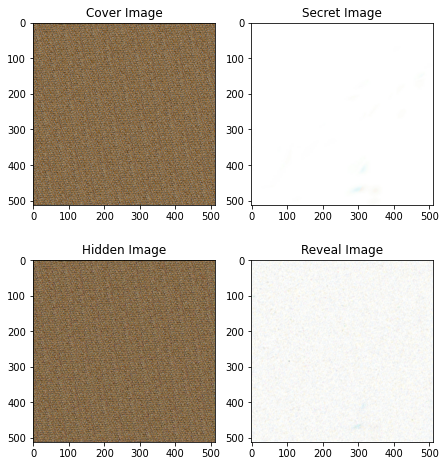

In [ ]:
plot(grids)

In [ ]:
'''
for i in range(5):
    grids = predict(loaded_model,test_data_loader)
    plot(grids)
'''

In [ ]:

r_np = imread('/content/drive/MyDrive/Colab Notebooks/Plotwave2.png')
g_np = imread('/content/drive/MyDrive/Colab Notebooks/Plotwave3.png')
b_np = imread('/content/drive/MyDrive/Colab Notebooks/Plotwave4.png')


# Add the channels to the final image
final_img = np.dstack([b_np[:,:,0], g_np[:,:,2], r_np[:,:,2]]).astype(np.uint8)

print(final_img.shape)
plt.imshow(final_img, interpolation='nearest')
plt.show()

NameError: ignored

In [ ]:
import pywt
from scipy.io import wavefile as wav
import matplotlib.pyplot as plt

# load audio file
sample_rate, data = wav.read('/content/drive/MyDrive/Colab Notebooks/Namaana laaj final corrected volume.wav')

# perform discrete wavelet transform
wavelet = 'db8'  # choose a wavelet function
coeffs = pywt.wavedec(data, wavelet, level=None)

# plot coefficients as an image
plt.imshow(coeffs[-1], cmap='gray')
plt.show()

ImportError: ignored

In [ ]:
!pip install scipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
